# Oncologico

## Librerias

In [1]:
%pip install sweetviz

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for pandas!=1.0.0,!=1.0.1,!=1.0.2,>=0.25.3 from https://files.pythonhosted.org/packages/ae/d9/3741b344f57484b423cd22194025a8489992ad9962196a62721ef9980045/pandas-2.1.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.16.0 from https://files.pythonhosted.org/packages/ad/11/52fbe97fd84c91105b651d25a122f8deed6d3519afb14f9771fac1c9b7de/numpy-1.26.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.2 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 61.2/61.2 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib>=3.1.3 from https://files.pythonhosted.org/packages/2e/51/c77a1486


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

ModuleNotFoundError: No module named 'seaborn'

## Funciones

In [63]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                else:
                    if (c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max):
                        df[col] = df[col].astype(np.float16)
                    elif (c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max):
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

## Lectura de dataframes

In [64]:
df2022 = pd.read_csv('Archivos/df2022.csv', 
                     dtype={'PERIODO':str, 'RENAES':str, 'UBIGEO':str, 'CODIGO_SERVICIO':str, 'DOCUMENTO_ANONIMIZADO':str}, 
                     encoding='latin1', on_bad_lines='warn', sep = ';')

df2022['FECHA_INTERNAMIENTO'] = pd.to_datetime(df2022['FECHA_INTERNAMIENTO'], format='%Y%m%d')
df2022['FECHA_ATENCION'] = pd.to_datetime(df2022['FECHA_ATENCION'], format='%Y%m%d')
df2022['FECHA_ALTA'] = pd.to_datetime(df2022['FECHA_ALTA'], format='%Y%m%d')
df2022['FECHA_CORTE'] = pd.to_datetime(df2022['FECHA_CORTE'], format='%Y%m%d')

df2022.head()


,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,64271,202303,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C509,...,FEMENINO,45,SIS PARA TODOS,071,Apoyo al diagnóstico,2023-02-17,NaT,NaT,168.95,2023-11-13
1,64278,202302,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,...,FEMENINO,49,SIS GRATUITO,901,Apoyo al Tratamiento,2023-01-30,NaT,NaT,32.12,2023-11-13
2,64281,202306,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C504,...,FEMENINO,47,SIS PARA TODOS,056,Consulta externa,2023-05-27,NaT,NaT,84.62,2023-11-13
3,64283,202303,00007397,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,AREQUIPA,Arequipa,Arequipa,Arequipa,040101,C61X,...,MASCULINO,64,SIS GRATUITO,056,Consulta externa,2023-02-03,NaT,NaT,22.74,2023-11-13
4,64286,202301,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C910,...,MASCULINO,14,SIS GRATUITO,056,Consulta externa,2023-01-06,NaT,NaT,9.28,2023-11-13


In [65]:
df2023 = pd.read_csv('Archivos/df2023.csv', 
                     dtype={'PERIODO':str, 'RENAES':str, 'UBIGEO':str, 'CODIGO_SERVICIO':str, 'DOCUMENTO_ANONIMIZADO':str}, 
                     encoding='latin1', on_bad_lines='warn', sep = ';')

df2023['FECHA_INTERNAMIENTO'] = pd.to_datetime(df2023['FECHA_INTERNAMIENTO'], format='%Y%m%d')
df2023['FECHA_ATENCION'] = pd.to_datetime(df2023['FECHA_ATENCION'], format='%Y%m%d')
df2023['FECHA_ALTA'] = pd.to_datetime(df2023['FECHA_ALTA'], format='%Y%m%d')
df2023['FECHA_CORTE'] = pd.to_datetime(df2023['FECHA_CORTE'], format='%Y%m%d')

df2023.head()

,ï»¿DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,5060,202212,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,...,FEMENINO,62,SIS GRATUITO,909,TeleorientaciÃ³n,2022-12-01,NaT,NaT,0.00,2023-05-25
1,5060,202212,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,...,FEMENINO,61,SIS GRATUITO,056,Consulta externa,2022-11-15,NaT,NaT,5.92,2023-05-25
2,112180,202207,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C169,...,MASCULINO,73,SIS INDEPENDIENTE,071,Apoyo al diagnÃ³stico (*),2022-06-28,NaT,NaT,222.04,2023-05-25
3,112180,202212,00006211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121,C169,...,MASCULINO,73,SIS INDEPENDIENTE,056,Consulta externa,2022-11-11,NaT,NaT,23.45,2023-05-25
4,112180,202212,00006211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121,C169,...,MASCULINO,73,SIS INDEPENDIENTE,056,Consulta externa,2022-11-30,NaT,NaT,23.45,2023-05-25


In [66]:
df = pd.concat([df2022, df2023]).reset_index(drop=True)
#df = reduce_memory_usage(df, verbose=True)
df

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE,ï»¿DOCUMENTO_ANONIMIZADO
0,64271,202303,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C509,...,45,SIS PARA TODOS,071,Apoyo al diagnóstico,2023-02-17,NaT,NaT,168.950,2023-11-13,NaN
1,64278,202302,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,...,49,SIS GRATUITO,901,Apoyo al Tratamiento,2023-01-30,NaT,NaT,32.120,2023-11-13,NaN
2,64281,202306,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C504,...,47,SIS PARA TODOS,056,Consulta externa,2023-05-27,NaT,NaT,84.620,2023-11-13,NaN
3,64283,202303,00007397,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,AREQUIPA,Arequipa,Arequipa,Arequipa,040101,C61X,...,64,SIS GRATUITO,056,Consulta externa,2023-02-03,NaT,NaT,22.740,2023-11-13,NaN
4,64286,202301,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C910,...,14,SIS GRATUITO,056,Consulta externa,2023-01-06,NaT,NaT,9.280,2023-11-13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820670,NaN,202210,00006216,INSTITUTO NACIONAL DE SALUD DEL NIÃO - BREÃA,LIMA,Lima,Lima,BreÃ±a,150105,C920,...,0,SIS GRATUITO,067,Internamiento con intervenciÃ³n quirÃºrgica mayor,2022-09-14,2022-08-27,2022-09-14,13551.679,2023-05-25,48329.0
820671,NaN,202209,00016918,INSTITUTO NACIONAL DE SALUD DEL NIÃO - SAN BORJA,LIMA,Lima,Lima,Lima,150101,C920,...,0,SIS GRATUITO,907,AtenciÃ³n por Telesalud,2022-09-13,NaT,NaT,0.000,2023-05-25,48329.0
820672,NaN,202210,00016918,INSTITUTO NACIONAL DE SALUD DEL NIÃO - SAN BORJA,LIMA,Lima,Lima,Lima,150101,C920,...,0,SIS GRATUITO,056,Consulta externa,2022-09-14,NaT,NaT,10.690,2023-05-25,48329.0
820673,NaN,202210,00005576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,250101,C859,...,0,SIS GRATUITO,063,AtenciÃ³n por emergencia con observaciÃ³n,2022-10-04,NaT,2022-10-04,97.900,2023-05-25,44999.0


In [67]:
#df.to_pickle('df.pkl')
#df = pd.read_pickle('df.pkl')

## Descripción de df

In [68]:
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    print(f"Column: {column}")
    print(f"Min Length: {df[column].str.len().min()}")
    print(f"Max Length: {df[column].str.len().max()}")
    print()

Column: DOCUMENTO_ANONIMIZADO
Min Length: 5.0
Max Length: 6.0

Column: PERIODO
Min Length: 6
Max Length: 6

Column: RENAES
Min Length: 8
Max Length: 8

Column: IPRESS
Min Length: 8.0
Max Length: 79.0

Column: REGION
Min Length: 3
Max Length: 15

Column: DEPARTAMENTO
Min Length: 3.0
Max Length: 13.0

Column: PROVINCIA
Min Length: 3.0
Max Length: 16.0

Column: DISTRITO
Min Length: 3.0
Max Length: 22.0

Column: UBIGEO
Min Length: 6.0
Max Length: 6.0

Column: CODIGO_DIAGNOSTICO
Min Length: 4
Max Length: 4

Column: DIAGNOSTICOS
Min Length: 12
Max Length: 87

Column: GRUPO_DIAGNOSTICOS
Min Length: 7
Max Length: 24

Column: GRUPO_COBERTURA
Min Length: 11
Max Length: 11

Column: SEXO
Min Length: 8
Max Length: 9

Column: TIPO_SEGURO
Min Length: 12
Max Length: 17

Column: CODIGO_SERVICIO
Min Length: 3
Max Length: 3

Column: SERVICIO
Min Length: 15
Max Length: 68



In [69]:
df.isnull().sum()

DOCUMENTO_ANONIMIZADO       513530
PERIODO                          0
RENAES                           0
IPRESS                         144
REGION                           0
DEPARTAMENTO                 16036
PROVINCIA                    16036
DISTRITO                     16036
UBIGEO                       24885
CODIGO_DIAGNOSTICO               0
DIAGNOSTICOS                     0
GRUPO_DIAGNOSTICOS               0
GRUPO_COBERTURA                  0
SEXO                             0
EDAD                             0
TIPO_SEGURO                      0
CODIGO_SERVICIO                  0
SERVICIO                         0
FECHA_ATENCION                   0
FECHA_INTERNAMIENTO         747670
FECHA_ALTA                  658789
MONTO_BRUTO                      0
FECHA_CORTE                      0
ï»¿DOCUMENTO_ANONIMIZADO    307145
dtype: int64

In [70]:
df.describe()

,EDAD,MONTO_BRUTO,ï»¿DOCUMENTO_ANONIMIZADO
count,820675.000000,820675.000000,5.135300e+05
mean,51.829405,251.351764,5.913935e+04
std,19.269562,2626.188154,8.345447e+04
min,0.000000,0.000000,0.000000e+00
25%,42.000000,10.550000,2.463400e+04
50%,54.000000,34.400000,5.041200e+04
75%,66.000000,96.500000,7.543100e+04
max,106.000000,800740.915000,1.408972e+06


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820675 entries, 0 to 820674
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DOCUMENTO_ANONIMIZADO     307145 non-null  object        
 1   PERIODO                   820675 non-null  object        
 2   RENAES                    820675 non-null  object        
 3   IPRESS                    820531 non-null  object        
 4   REGION                    820675 non-null  object        
 5   DEPARTAMENTO              804639 non-null  object        
 6   PROVINCIA                 804639 non-null  object        
 7   DISTRITO                  804639 non-null  object        
 8   UBIGEO                    795790 non-null  object        
 9   CODIGO_DIAGNOSTICO        820675 non-null  object        
 10  DIAGNOSTICOS              820675 non-null  object        
 11  GRUPO_DIAGNOSTICOS        820675 non-null  object        
 12  GR

In [72]:
df.shape

(820675, 24)

In [73]:
df.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE,ï»¿DOCUMENTO_ANONIMIZADO
0,64271,202303,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C509,...,45,SIS PARA TODOS,071,Apoyo al diagnóstico,2023-02-17,NaT,NaT,168.95,2023-11-13,NaN
1,64278,202302,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,...,49,SIS GRATUITO,901,Apoyo al Tratamiento,2023-01-30,NaT,NaT,32.12,2023-11-13,NaN
2,64281,202306,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C504,...,47,SIS PARA TODOS,056,Consulta externa,2023-05-27,NaT,NaT,84.62,2023-11-13,NaN
3,64283,202303,00007397,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,AREQUIPA,Arequipa,Arequipa,Arequipa,040101,C61X,...,64,SIS GRATUITO,056,Consulta externa,2023-02-03,NaT,NaT,22.74,2023-11-13,NaN
4,64286,202301,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C910,...,14,SIS GRATUITO,056,Consulta externa,2023-01-06,NaT,NaT,9.28,2023-11-13,NaN


## Limpieza

In [74]:
df_filtered = df[(df['GRUPO_DIAGNOSTICOS'] == 'CANCER DE MAMA') & (df['SEXO'] == 'MASCULINO')]
documento_anonimizado = df_filtered['DOCUMENTO_ANONIMIZADO']
df = df[~df['DOCUMENTO_ANONIMIZADO'].isin(documento_anonimizado)]

df_filtered = df[(df['GRUPO_DIAGNOSTICOS'] == 'CANCER DE PROSTATA') & (df['SEXO'] == 'FEMENINO')]
documento_anonimizado = df_filtered['DOCUMENTO_ANONIMIZADO']
df = df[~df['DOCUMENTO_ANONIMIZADO'].isin(documento_anonimizado)]

In [75]:
df['REGION'] = df['REGION'].str.strip()
df['REGION'] = df['REGION'].str.replace('R. LA LIBERTAD', 'LA LIBERTAD')
df['REGION'] = df['REGION'].str.replace('REGION CALLAO', 'CALLAO')
df['REGION'] = df['REGION'].str.replace('REGION LIMA', 'LIMA')

C:\Users\jorge\AppData\Local\Temp\ipykernel_21936\1292203352.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['REGION'] = df['REGION'].str.replace('R. LA LIBERTAD', 'LA LIBERTAD')


In [76]:
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.strip()

In [77]:
df['PROVINCIA'] = df['PROVINCIA'].str.upper()
df['PROVINCIA'] = df['PROVINCIA'].str.strip()

In [78]:
df['DISTRITO'] = df['DISTRITO'].str.upper()
df['DISTRITO'] = df['DISTRITO'].str.strip()

In [79]:
df['GENEROS'] = df.groupby('DOCUMENTO_ANONIMIZADO')['SEXO'].transform('nunique')

In [80]:
df['GENEROS'].value_counts()

1    234741
2     69471
Name: GENEROS, dtype: int64

In [81]:
df = df.sort_values('DOCUMENTO_ANONIMIZADO')

In [82]:
df[df['GENEROS']==2]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE,ï»¿DOCUMENTO_ANONIMIZADO,GENEROS
51886,00022,202304,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C61X,...,SIS GRATUITO,056,Consulta externa,2023-03-03,NaT,NaT,2.04,2023-11-13,NaN,2
51778,00022,202304,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C61X,...,SIS GRATUITO,071,Apoyo al diagnóstico,2023-03-20,NaT,NaT,13.55,2023-11-13,NaN,2
51771,00022,202305,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C61X,...,SIS GRATUITO,056,Consulta externa,2023-05-05,NaT,NaT,1.71,2023-11-13,NaN,2
51706,00022,202302,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C61X,...,SIS GRATUITO,056,Consulta externa,2023-02-08,NaT,NaT,4.10,2023-11-13,NaN,2
51779,00022,202304,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C61X,...,SIS GRATUITO,071,Apoyo al diagnóstico,2023-03-27,NaT,NaT,13.79,2023-11-13,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305763,99971,202306,00007277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,LA LIBERTAD,TRUJILLO,TRUJILLO,130101,C189,...,SIS PARA TODOS,056,Consulta externa,2023-06-06,NaT,2023-06-06,10.55,2023-11-13,NaN,2
304473,99971,202305,00007277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,LA LIBERTAD,TRUJILLO,TRUJILLO,130101,C189,...,SIS PARA TODOS,056,Consulta externa,2023-04-27,NaT,2023-04-27,10.55,2023-11-13,NaN,2
304055,99971,202305,00007277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,LA LIBERTAD,TRUJILLO,TRUJILLO,130101,C189,...,SIS PARA TODOS,071,Apoyo al diagnóstico,2023-05-04,NaT,2023-05-04,124.61,2023-11-13,NaN,2
306511,99971,202306,00007277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,LA LIBERTAD,TRUJILLO,TRUJILLO,130101,C189,...,SIS PARA TODOS,056,Consulta externa,2023-05-25,NaT,2023-05-25,10.55,2023-11-13,NaN,2


In [83]:
df = df[df['GENEROS']==1]

In [84]:
df.shape

(234741, 25)

In [85]:
df['TOTAL_ATENCIONES'] = df.groupby('DOCUMENTO_ANONIMIZADO')['DOCUMENTO_ANONIMIZADO'].transform('count')
df['TOTAL_IPRESS'] = df.groupby('DOCUMENTO_ANONIMIZADO')['IPRESS'].transform('nunique')
df['TOTAL_REGION'] = df.groupby('DOCUMENTO_ANONIMIZADO')['REGION'].transform('nunique')
df['TOTAL_DEPARTAMENTO'] = df.groupby('DOCUMENTO_ANONIMIZADO')['DEPARTAMENTO'].transform('nunique')
df['TOTAL_PROVINCIA'] = df.groupby('DOCUMENTO_ANONIMIZADO')['PROVINCIA'].transform('nunique')
df['TOTAL_DISTRITO'] = df.groupby('DOCUMENTO_ANONIMIZADO')['DISTRITO'].transform('nunique')
df['TOTAL_DIAGNOSTICOS'] = df.groupby('DOCUMENTO_ANONIMIZADO')['DIAGNOSTICOS'].transform('nunique')
df['TOTAL_GRUPO_DIAGNOSTICOS'] = df.groupby('DOCUMENTO_ANONIMIZADO')['GRUPO_DIAGNOSTICOS'].transform('nunique')
df['TOTAL_EDAD'] = df.groupby('DOCUMENTO_ANONIMIZADO')['EDAD'].transform('nunique')
df['EDAD_MIN'] = df.groupby('DOCUMENTO_ANONIMIZADO')['EDAD'].transform('min')
df['EDAD_MAX'] = df.groupby('DOCUMENTO_ANONIMIZADO')['EDAD'].transform('max')
df['TOTAL_TIPO_SEGURO'] = df.groupby('DOCUMENTO_ANONIMIZADO')['TIPO_SEGURO'].transform('nunique')

df['TIPO_SERVICIO'] = df['SERVICIO'].map({
    'Consulta externa': 'CONSULTA',
    'Teleorientación': 'CONSULTA',
    'Teleorientacion': 'CONSULTA',
    'Consulta externa por profesionales no médicos ni odontólogos ': 'CONSULTA',
    'Apoyo al diagnóstico (*)': 'DIAGNOSTICO',
    'Apoyo al diagnóstico': 'DIAGNOSTICO',
    'Apoyo al Tratamiento': 'TRATAMIENTO',
    'Telemonitoreo con prescripción y entrega de Medicamentos': 'TRATAMIENTO',
    'Telemonitoreo con Prescripción y Entrega de Medicamentos': 'TRATAMIENTO',
    'Internamiento en EESS sin intervención quirúrgica': 'INTERNAMIENTO',
    'Internamiento con intervención quirúrgica mayor': 'INTERNAMIENTO',
    'Internamiento con Estancia en la Unidad de Cuidados Intensivos (UCI)': 'INTERNAMIENTO',
    'Internamientocon Estancia en la Unidad de Cuidados Intensivos (UCI)': 'INTERNAMIENTO',
    'Internamiento con intervención quirúrgica menor': 'INTERNAMIENTO',
    'Intervención médico-quirúrgica ambulatoria': 'ATENCION',
    'Atención por emergencia': 'ATENCION',
    'Atención por Telesalud': 'ATENCION',
    'Atención en tópico': 'ATENCION',
    'Atención domiciliaria': 'ATENCION',
    'Transfusión sanguínea o hemoderivados ': 'ATENCION',
    'Atención por emergencia con observación': 'ATENCION'
})

df['TOTAL_SERVICIOS'] = df.groupby('DOCUMENTO_ANONIMIZADO')['SERVICIO'].transform('count')
df['TOTAL_SERVICIO_UNICO'] = df.groupby('DOCUMENTO_ANONIMIZADO')['SERVICIO'].transform('nunique')
df['TOTAL_TIPO_SERVICIO'] = df.groupby('DOCUMENTO_ANONIMIZADO')['TIPO_SERVICIO'].transform('count')
df['TOTAL_TIPO_SERVICIO_UNICO'] = df.groupby('DOCUMENTO_ANONIMIZADO')['TIPO_SERVICIO'].transform('nunique')
df['TIPO_CONSULTA'] = df[df['TIPO_SERVICIO'] == 'CONSULTA'].groupby('DOCUMENTO_ANONIMIZADO')['TIPO_SERVICIO'].transform('count')
df['TIPO_DIAGNOSTICO'] = df[df['TIPO_SERVICIO'] == 'DIAGNOSTICO'].groupby('DOCUMENTO_ANONIMIZADO')['TIPO_SERVICIO'].transform('count')
df['TIPO_TRATAMIENTO'] = df[df['TIPO_SERVICIO'] == 'TRATAMIENTO'].groupby('DOCUMENTO_ANONIMIZADO')['TIPO_SERVICIO'].transform('count')
df['TIPO_INTERNAMIENTO'] = df[df['TIPO_SERVICIO'] == 'INTERNAMIENTO'].groupby('DOCUMENTO_ANONIMIZADO')['TIPO_SERVICIO'].transform('count')
df['TIPO_ATENCION'] = df[df['TIPO_SERVICIO'] == 'ATENCION'].groupby('DOCUMENTO_ANONIMIZADO')['TIPO_SERVICIO'].transform('count')

# 'TIPO_SERVICIO == 'DIAGNOSTICO', por 'DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'
DNI_DIAG_SERVICIO = df[df['TIPO_SERVICIO'] == 'DIAGNOSTICO'].groupby(['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'])['TIPO_SERVICIO'].count().reset_index(name='DNI_DIAG_DIAGNOSTICO')
df = df.merge(DNI_DIAG_SERVICIO, on=['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'], how='left')

# 'TIPO_SERVICIO == 'TRATAMIENTO', por 'DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'
DNI_DIAG_SERVICIO = df[df['TIPO_SERVICIO'] == 'TRATAMIENTO'].groupby(['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'])['TIPO_SERVICIO'].count().reset_index(name='DNI_DIAG_TRATAMIENTO')
df = df.merge(DNI_DIAG_SERVICIO, on=['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'], how='left')
  
# 'TIPO_SERVICIO == 'INTERNAMIENTO', por 'DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'
DNI_DIAG_SERVICIO = df[df['TIPO_SERVICIO'] == 'INTERNAMIENTO'].groupby(['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'])['TIPO_SERVICIO'].count().reset_index(name='DNI_DIAG_INTERNAMIENTO')
df = df.merge(DNI_DIAG_SERVICIO, on=['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'], how='left')

# 'TIPO_SERVICIO == 'ATENCION', por 'DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'
DNI_DIAG_SERVICIO = df[df['TIPO_SERVICIO'] == 'ATENCION'].groupby(['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'])['TIPO_SERVICIO'].count().reset_index(name='DNI_DIAG_ATENCION')
df = df.merge(DNI_DIAG_SERVICIO, on=['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'], how='left')

# 'TIPO_SERVICIO == 'CONSULTA', por 'DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'
DNI_DIAG_SERVICIO = df[df['TIPO_SERVICIO'] == 'CONSULTA'].groupby(['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'])['TIPO_SERVICIO'].count().reset_index(name='DNI_DIAG_CONSULTA')
df = df.merge(DNI_DIAG_SERVICIO, on=['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'], how='left')
#DIAGNOSTICO TRATAMIENTO INTERNAMIENTO ATENCION CONSULTA
#df.head()

In [86]:
# Converting the 'FECHA_ATENCION' column to datetime format
df['FECHA_ATENCION'] = pd.to_datetime(df['FECHA_ATENCION'])
df['FECHA_ATENCION'] = df['FECHA_ATENCION'].dt.date
# Counting the total by 'DOCUMENTO_ANONIMIZADO' using the 'FECHA_ATENCION' column
df['TOTAL_FECHA_ATENCION']= df.groupby('DOCUMENTO_ANONIMIZADO')['FECHA_ATENCION'].transform('count')
df['TOTAL_FECHA_ATENCION_UNICA'] = df.groupby('DOCUMENTO_ANONIMIZADO')['FECHA_ATENCION'].transform('nunique')

In [87]:
# Check if FECHA_ALTA and FECHA_INTERNAMIENTO are not null
mask = (df['FECHA_ALTA'].notnull()) & (df['FECHA_INTERNAMIENTO'].notnull())
df['DIAS_INTERNAMIENTO'] = ''
# Calculate the difference in days between FECHA_ALTA and FECHA_INTERNAMIENTO
df.loc[mask, 'DIAS_INTERNAMIENTO'] = (df['FECHA_ALTA'] - df['FECHA_INTERNAMIENTO']).dt.days

In [88]:
df[df['TIPO_SERVICIO'] == 'DIAGNOSTICO'].groupby(['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'])['MONTO_BRUTO'].sum().reset_index(name='MONTO_BRUTO_DNI_DIAG')

,DOCUMENTO_ANONIMIZADO,GRUPO_DIAGNOSTICOS,MONTO_BRUTO_DNI_DIAG
0,00011,LEUCEMIA,47.690
1,00016,LEUCEMIA,840.030
2,00032,CANCER DE ESTOMAGO,412.860
3,00032,LINFOMA,773.880
4,00034,CANCER DE CUELLO UTERINO,132.510
...,...,...,...
16940,99960,LINFOMA,697.391
16941,99961,CANCER DE MAMA,42.180
16942,99970,CANCER DE MAMA,403.190
16943,99973,CANCER DE PROSTATA,316.140


In [89]:
# 'TIPO_SERVICIO == 'DIAGNOSTICO', por 'DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'
MONTO_BRUTO = df[df['TIPO_SERVICIO'] == 'DIAGNOSTICO'].groupby(['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'])['MONTO_BRUTO'].sum().reset_index(name='MONTO_BRUTO_DNI_DIAG')
df = df.merge(MONTO_BRUTO, on=['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'], how='left')

In [90]:
df['DIF_EDAD'] = df['EDAD_MAX'] - df['EDAD_MIN']

### Leer o guardar formato pickle

In [91]:
df.to_pickle('df_variables.pkl')
df = pd.read_pickle('df_variables.pkl')
df = df[df['DIF_EDAD']<=2]
df.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,DNI_DIAG_DIAGNOSTICO,DNI_DIAG_TRATAMIENTO,DNI_DIAG_INTERNAMIENTO,DNI_DIAG_ATENCION,DNI_DIAG_CONSULTA,TOTAL_FECHA_ATENCION,TOTAL_FECHA_ATENCION_UNICA,DIAS_INTERNAMIENTO,MONTO_BRUTO_DNI_DIAG,DIF_EDAD
2,00016,202304,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,,840.03,1
3,00016,202304,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,,840.03,1
4,00016,202304,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,,840.03,1
5,00016,202306,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,,840.03,1
6,00016,202305,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,,840.03,1


In [92]:
df = df[df['REGION'] == 'LIMA']

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118133 entries, 2 to 234734
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   DOCUMENTO_ANONIMIZADO       118133 non-null  object        
 1   PERIODO                     118133 non-null  object        
 2   RENAES                      118133 non-null  object        
 3   IPRESS                      118133 non-null  object        
 4   REGION                      118133 non-null  object        
 5   DEPARTAMENTO                118133 non-null  object        
 6   PROVINCIA                   118133 non-null  object        
 7   DISTRITO                    118133 non-null  object        
 8   UBIGEO                      118133 non-null  object        
 9   CODIGO_DIAGNOSTICO          118133 non-null  object        
 10  DIAGNOSTICOS                118133 non-null  object        
 11  GRUPO_DIAGNOSTICOS          118133 non-

In [94]:
df.describe()

,EDAD,MONTO_BRUTO,ï»¿DOCUMENTO_ANONIMIZADO,GENEROS,TOTAL_ATENCIONES,TOTAL_IPRESS,TOTAL_REGION,TOTAL_DEPARTAMENTO,TOTAL_PROVINCIA,TOTAL_DISTRITO,...,TIPO_ATENCION,DNI_DIAG_DIAGNOSTICO,DNI_DIAG_TRATAMIENTO,DNI_DIAG_INTERNAMIENTO,DNI_DIAG_ATENCION,DNI_DIAG_CONSULTA,TOTAL_FECHA_ATENCION,TOTAL_FECHA_ATENCION_UNICA,MONTO_BRUTO_DNI_DIAG,DIF_EDAD
count,118133.000000,118133.000000,0.0,118133.0,118133.000000,118133.000000,118133.000000,118133.000000,118133.000000,118133.000000,...,7268.000000,102216.000000,76345.000000,31136.000000,53696.000000,114122.000000,118133.000000,118133.000000,102216.000000,118133.000000
mean,45.955762,324.862667,NaN,1.0,22.721170,1.197946,1.078979,1.078979,1.090424,1.196059,...,4.627133,6.560852,8.467077,1.544771,3.554417,9.499956,22.721170,20.418664,899.549770,0.429440
std,21.800771,3184.540807,NaN,0.0,16.254207,0.446786,0.280688,0.280688,0.301073,0.440689,...,3.687787,4.233885,7.351759,0.942196,3.149067,6.622017,16.254207,13.864644,922.141679,0.542953
min,0.000000,0.000000,NaN,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,13.873000,NaN,1.0,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,3.000000,1.000000,1.000000,5.000000,9.000000,9.000000,302.020000,0.000000
50%,49.000000,43.760000,NaN,1.0,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,6.000000,6.000000,1.000000,2.000000,8.000000,20.000000,19.000000,700.010000,0.000000
75%,63.000000,109.150000,NaN,1.0,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,9.000000,11.000000,2.000000,5.000000,13.000000,32.000000,29.000000,1208.420000,1.000000
max,101.000000,265966.280000,NaN,1.0,100.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,24.000000,25.000000,46.000000,8.000000,22.000000,43.000000,100.000000,77.000000,12500.780000,2.000000


In [95]:
df.isnull().sum()

DOCUMENTO_ANONIMIZADO              0
PERIODO                            0
RENAES                             0
IPRESS                             0
REGION                             0
DEPARTAMENTO                       0
PROVINCIA                          0
DISTRITO                           0
UBIGEO                             0
CODIGO_DIAGNOSTICO                 0
DIAGNOSTICOS                       0
GRUPO_DIAGNOSTICOS                 0
GRUPO_COBERTURA                    0
SEXO                               0
EDAD                               0
TIPO_SEGURO                        0
CODIGO_SERVICIO                    0
SERVICIO                           0
FECHA_ATENCION                     0
FECHA_INTERNAMIENTO           115651
FECHA_ALTA                    115470
MONTO_BRUTO                        0
FECHA_CORTE                        0
ï»¿DOCUMENTO_ANONIMIZADO      118133
GENEROS                            0
TOTAL_ATENCIONES                   0
TOTAL_IPRESS                       0
T

## Descriptivo

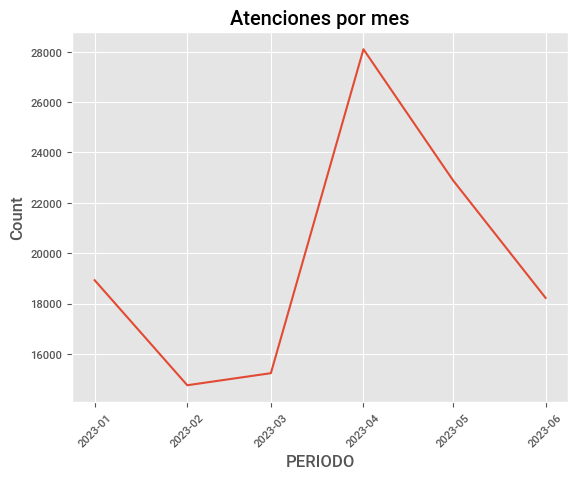

In [96]:
# Convert the first 6 digits of PERIODO to year and month
df['PERIODO'] = pd.to_datetime(df['PERIODO'], format='%Y%m')

# Group the data by PERIODO and count the number of occurrences
periodo_counts = df['PERIODO'].value_counts()

# Sort the data by PERIODO
periodo_counts = periodo_counts.sort_index()

# Set the ggplot style
plt.style.use('ggplot')

# Create a line plot
plt.plot(periodo_counts.index, periodo_counts.values)

# Set the x-axis label
plt.xlabel('PERIODO')

# Set the y-axis label
plt.ylabel('Count')

# Set the title of the plot
plt.title('Atenciones por mes')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

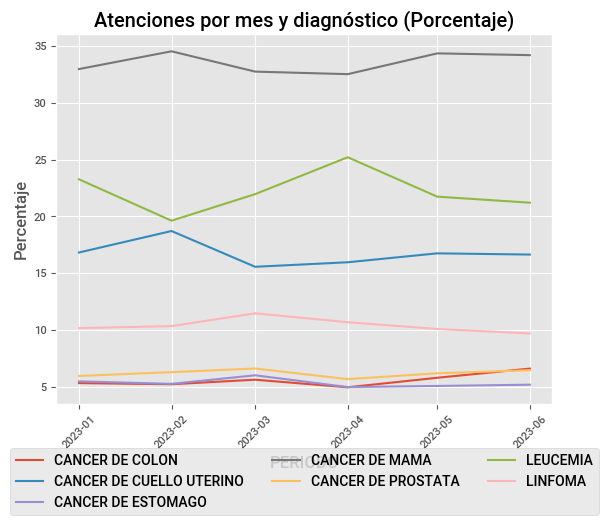

In [97]:
# Convert the first 7 digits of PERIODO to year and month
df['PERIODO'] = pd.to_datetime(df['PERIODO'], format='%Y-%m')

# Group the data by PERIODO and DIAGNOSTICOS and count the number of occurrences
periodo_diagnosticos_counts = df.groupby(['PERIODO', 'GRUPO_DIAGNOSTICOS']).size().unstack()

# Calculate the percentage of each DIAGNOSTICOS for each PERIODO
periodo_diagnosticos_percentages = periodo_diagnosticos_counts.div(periodo_diagnosticos_counts.sum(axis=1), axis=0) * 100

# Set the ggplot style
plt.style.use('ggplot')

# Create a line plot for each DIAGNOSTICOS
for col in periodo_diagnosticos_percentages.columns:
    plt.plot(periodo_diagnosticos_percentages.index, periodo_diagnosticos_percentages[col], label=col)

# Set the x-axis label
plt.xlabel('PERIODO')

# Set the y-axis label
plt.ylabel('Percentaje')

# Set the title of the plot
plt.title('Atenciones por mes y diagnóstico (Porcentaje)')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend and position it at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Display the plot
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_21936\421790317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PERIODO'] = pd.to_datetime(filtered_df['PERIODO'], format='%Y-%m')


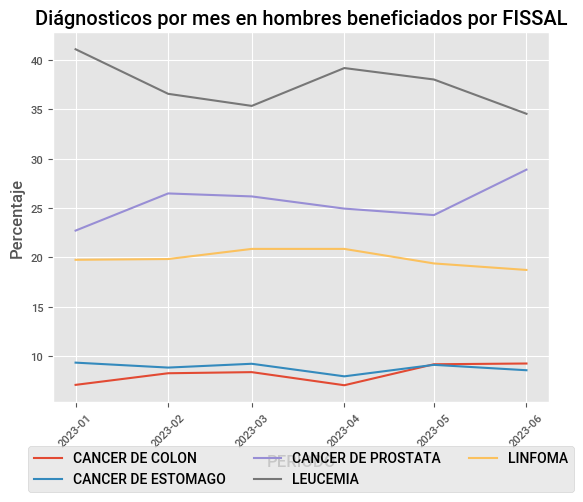

In [98]:
# Filter the data for SEXO = MASCULINO
filtered_df = df[(df['SEXO'] == 'MASCULINO') & (df['TIPO_SERVICIO'] =='DIAGNOSTICO')]

# Convert the first 7 digits of PERIODO to year and month
filtered_df['PERIODO'] = pd.to_datetime(filtered_df['PERIODO'], format='%Y-%m')

# Group the filtered data by PERIODO and DIAGNOSTICOS and count the number of occurrences
periodo_diagnosticos_counts = filtered_df.groupby(['PERIODO', 'GRUPO_DIAGNOSTICOS']).size().unstack()

# Calculate the percentage of each DIAGNOSTICOS for each PERIODO
periodo_diagnosticos_percentages = periodo_diagnosticos_counts.div(periodo_diagnosticos_counts.sum(axis=1), axis=0) * 100

# Set the ggplot style
plt.style.use('ggplot')

# Create a line plot for each DIAGNOSTICOS
for col in periodo_diagnosticos_percentages.columns:
    plt.plot(periodo_diagnosticos_percentages.index, periodo_diagnosticos_percentages[col], label=col)

# Set the x-axis label
plt.xlabel('PERIODO')

# Set the y-axis label
plt.ylabel('Percentaje')

# Set the title of the plot
plt.title('Diágnosticos por mes en hombres beneficiados por FISSAL')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend and position it at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Save the plot as a PNG file
plt.savefig('diagnosticos_por_mes_hombres.png', format='png')

# Display the plot
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_21936\621458404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PERIODO'] = pd.to_datetime(filtered_df['PERIODO'], format='%Y-%m')


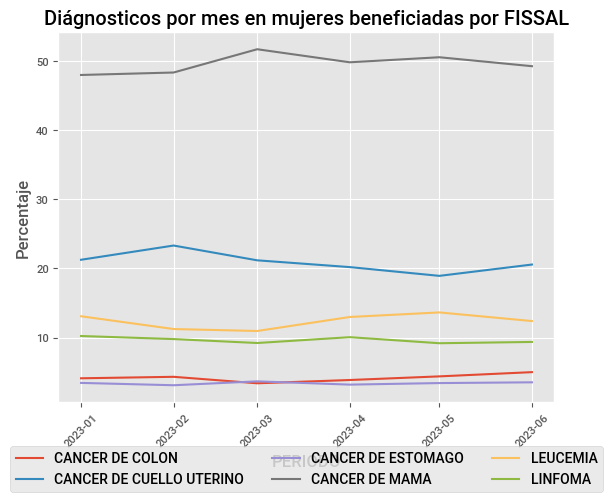

In [99]:
# Filter the data for SEXO = MASCULINO
filtered_df = df[(df['SEXO'] == 'FEMENINO') & (df['TIPO_SERVICIO'] =='DIAGNOSTICO')]

# Convert the first 7 digits of PERIODO to year and month
filtered_df['PERIODO'] = pd.to_datetime(filtered_df['PERIODO'], format='%Y-%m')

# Group the filtered data by PERIODO and DIAGNOSTICOS and count the number of occurrences
periodo_diagnosticos_counts = filtered_df.groupby(['PERIODO', 'GRUPO_DIAGNOSTICOS']).size().unstack()

# Calculate the percentage of each DIAGNOSTICOS for each PERIODO
periodo_diagnosticos_percentages = periodo_diagnosticos_counts.div(periodo_diagnosticos_counts.sum(axis=1), axis=0) * 100

# Set the ggplot style
plt.style.use('ggplot')

# Create a line plot for each DIAGNOSTICOS
for col in periodo_diagnosticos_percentages.columns:
    plt.plot(periodo_diagnosticos_percentages.index, periodo_diagnosticos_percentages[col], label=col)

# Set the x-axis label
plt.xlabel('PERIODO')

# Set the y-axis label
plt.ylabel('Percentaje')

# Set the title of the plot
plt.title('Diágnosticos por mes en mujeres beneficiadas por FISSAL')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend and position it at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Save the plot as a PNG file
plt.savefig('diagnosticos_por_mes_mujeres.png', format='png')

# Display the plot
plt.show()

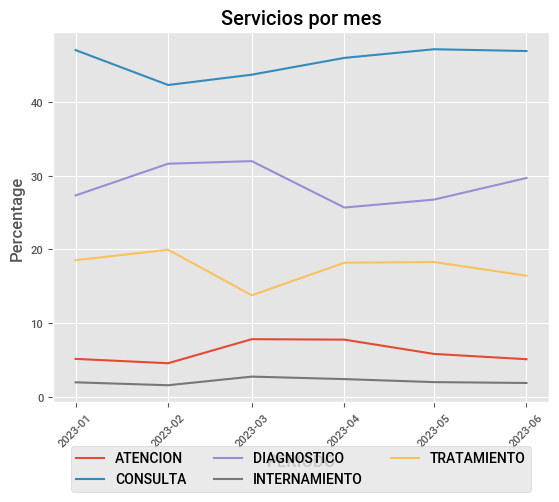

In [100]:
# Filter the data for SEXO = MASCULINO
filtered_df = df.copy()

# Convert the first 7 digits of PERIODO to year and month
filtered_df['PERIODO'] = pd.to_datetime(filtered_df['PERIODO'], format='%Y-%m')

# Group the filtered data by PERIODO and DIAGNOSTICOS and count the number of occurrences
periodo_diagnosticos_counts = filtered_df.groupby(['PERIODO', 'TIPO_SERVICIO']).size().unstack()

# Calculate the percentage of each DIAGNOSTICOS for each PERIODO
periodo_diagnosticos_percentages = periodo_diagnosticos_counts.div(periodo_diagnosticos_counts.sum(axis=1), axis=0) * 100

# Set the ggplot style
plt.style.use('ggplot')

# Create a line plot for each DIAGNOSTICOS
for col in periodo_diagnosticos_percentages.columns:
    plt.plot(periodo_diagnosticos_percentages.index, periodo_diagnosticos_percentages[col], label=col)

# Set the x-axis label
plt.xlabel('PERIODO')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title of the plot
plt.title('Servicios por mes')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend and position it at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Save the plot as a PNG file
plt.savefig('Servicios por mes.png', format='png')

# Display the plot
plt.show()

In [101]:
# Group by 'GRUPO_DIAGNOSTICOS' and calculate the mean, median, min, max, 25th percentile, 75th percentile, 90th percentile, and 95th percentile
grouped_stats = df.groupby('GRUPO_DIAGNOSTICOS')['TIPO_DIAGNOSTICO'].agg(['mean', 'median', 'min', 'max', lambda x: np.percentile(x, 0.25), lambda x: np.percentile(x, 0.75), lambda x: np.percentile(x, 0.90), lambda x: np.percentile(x, 0.95)]).transpose()

# Display the grouped statistics
grouped_stats

GRUPO_DIAGNOSTICOS,CANCER DE COLON,CANCER DE CUELLO UTERINO,CANCER DE ESTOMAGO,CANCER DE MAMA,CANCER DE PROSTATA,LEUCEMIA,LINFOMA
mean,5.683494,6.962272,5.604052,6.647029,4.936833,7.832948,6.744788
median,5.000000,6.000000,5.000000,7.000000,5.000000,7.000000,6.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,25.000000,21.000000,20.000000,25.000000,15.000000,24.000000,25.000000
<lambda_0>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<lambda_1>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<lambda_2>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<lambda_3>,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sweet viz

In [102]:
# Corrected code
df['DIAS_INTERNAMIENTO'] = pd.to_numeric(df['DIAS_INTERNAMIENTO'], errors='coerce')
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sweetviz\series_analyzer.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Schema

In [1]:
df.columns.values

NameError: name 'df' is not defined

# Do not consider the code below

In [103]:
# Group by 'GRUPO_DIAGNOSTICOS' and calculate the mean, median, min, max, 25th percentile, 75th percentile, 90th percentile, and 95th percentile
df1 = df.drop_duplicates(['DOCUMENTO_ANONIMIZADO', 'GRUPO_DIAGNOSTICOS'])
grouped_stats = df1.groupby('GRUPO_DIAGNOSTICOS')['MONTO_BRUTO_DNI_DIAG'].agg(['mean', 'median', 'min', 'max', lambda x: np.percentile(x, 0.25), lambda x: np.percentile(x, 0.75), lambda x: np.percentile(x, 0.90), lambda x: np.percentile(x, 0.95)]).transpose()

# Display the grouped statistics
grouped_stats

GRUPO_DIAGNOSTICOS,CANCER DE COLON,CANCER DE CUELLO UTERINO,CANCER DE ESTOMAGO,CANCER DE MAMA,CANCER DE PROSTATA,LEUCEMIA,LINFOMA
mean,475.77351,575.540983,460.484013,470.900377,364.489972,644.88852,583.784767
median,305.22900,367.890000,318.905000,244.075000,146.270000,395.04000,257.950000
min,3.50000,1.920000,3.150000,0.000000,3.500000,0.00000,1.920000
max,4078.99000,6707.910000,3639.154000,4537.400000,6200.270000,12500.78000,5070.210000
<lambda_0>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<lambda_1>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<lambda_2>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<lambda_3>,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,DNI_DIAG_DIAGNOSTICO,DNI_DIAG_TRATAMIENTO,DNI_DIAG_INTERNAMIENTO,DNI_DIAG_ATENCION,DNI_DIAG_CONSULTA,TOTAL_FECHA_ATENCION,TOTAL_FECHA_ATENCION_UNICA,DIAS_INTERNAMIENTO,MONTO_BRUTO_DNI_DIAG,DIF_EDAD
2,00016,2023-04-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,NaN,840.03,1
3,00016,2023-04-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,NaN,840.03,1
4,00016,2023-04-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,NaN,840.03,1
5,00016,2023-06-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,NaN,840.03,1
6,00016,2023-05-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,7.0,5.0,1.0,1.0,8.0,22,22,NaN,840.03,1


In [105]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [106]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

# Select the columns for clustering
data = df1[['GRUPO_DIAGNOSTICOS', 'SEXO', 'EDAD', 'TIPO_SEGURO', 'TOTAL_ATENCIONES', 'TOTAL_IPRESS', 'TOTAL_REGION', 'TOTAL_GRUPO_DIAGNOSTICOS', 'TIPO_SERVICIO', 'DNI_DIAG_DIAGNOSTICO', 'DNI_DIAG_TRATAMIENTO', 'DNI_DIAG_INTERNAMIENTO', 'DNI_DIAG_ATENCION', 'DNI_DIAG_CONSULTA', 'MONTO_BRUTO_DNI_DIAG']]

# Convert categorical columns to string type
data['GRUPO_DIAGNOSTICOS'] = data['GRUPO_DIAGNOSTICOS'].astype(str)
data['SEXO'] = data['SEXO'].astype(str)
data['TIPO_SEGURO'] = data['TIPO_SEGURO'].astype(str)
data['TIPO_SERVICIO'] = data['TIPO_SERVICIO'].astype(str)

C:\Users\jorge\AppData\Local\Temp\ipykernel_21936\3268156031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GRUPO_DIAGNOSTICOS'] = data['GRUPO_DIAGNOSTICOS'].astype(str)
C:\Users\jorge\AppData\Local\Temp\ipykernel_21936\3268156031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SEXO'] = data['SEXO'].astype(str)
C:\Users\jorge\AppData\Local\Temp\ipykernel_21936\3268156031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [107]:
data.isnull().sum()

GRUPO_DIAGNOSTICOS              0
SEXO                            0
EDAD                            0
TIPO_SEGURO                     0
TOTAL_ATENCIONES                0
TOTAL_IPRESS                    0
TOTAL_REGION                    0
TOTAL_GRUPO_DIAGNOSTICOS        0
TIPO_SERVICIO                   0
DNI_DIAG_DIAGNOSTICO         5480
DNI_DIAG_TRATAMIENTO        10947
DNI_DIAG_INTERNAMIENTO      12703
DNI_DIAG_ATENCION           11522
DNI_DIAG_CONSULTA            2446
MONTO_BRUTO_DNI_DIAG         5480
dtype: int64

In [108]:
data[data['DNI_DIAG_DIAGNOSTICO'].isnull()]

,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,TOTAL_ATENCIONES,TOTAL_IPRESS,TOTAL_REGION,TOTAL_GRUPO_DIAGNOSTICOS,TIPO_SERVICIO,DNI_DIAG_DIAGNOSTICO,DNI_DIAG_TRATAMIENTO,DNI_DIAG_INTERNAMIENTO,DNI_DIAG_ATENCION,DNI_DIAG_CONSULTA,MONTO_BRUTO_DNI_DIAG
85,CANCER DE COLON,MASCULINO,46,SIS PARA TODOS,1,1,1,1,ATENCION,NaN,NaN,NaN,1.0,NaN,NaN
86,LEUCEMIA,FEMENINO,2,SIS GRATUITO,1,1,1,1,ATENCION,NaN,NaN,NaN,1.0,NaN,NaN
107,CANCER DE CUELLO UTERINO,FEMENINO,75,SIS GRATUITO,3,2,2,1,CONSULTA,NaN,NaN,NaN,NaN,3.0,NaN
140,LEUCEMIA,FEMENINO,44,SIS PARA TODOS,7,2,2,1,ATENCION,NaN,NaN,3.0,3.0,1.0,NaN
202,CANCER DE COLON,FEMENINO,41,SIS GRATUITO,1,1,1,1,ATENCION,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234489,CANCER DE CUELLO UTERINO,FEMENINO,42,SIS GRATUITO,3,1,1,1,CONSULTA,NaN,NaN,NaN,NaN,3.0,NaN
234523,CANCER DE MAMA,FEMENINO,50,SIS PARA TODOS,1,1,1,1,CONSULTA,NaN,NaN,NaN,NaN,1.0,NaN
234533,LEUCEMIA,FEMENINO,36,SIS PARA TODOS,1,1,1,1,CONSULTA,NaN,NaN,NaN,NaN,1.0,NaN
234538,CANCER DE PROSTATA,MASCULINO,70,SIS PARA TODOS,5,2,2,1,CONSULTA,NaN,NaN,1.0,NaN,4.0,NaN


In [109]:
df1[df1['DNI_DIAG_DIAGNOSTICO'].isnull()]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,DNI_DIAG_DIAGNOSTICO,DNI_DIAG_TRATAMIENTO,DNI_DIAG_INTERNAMIENTO,DNI_DIAG_ATENCION,DNI_DIAG_CONSULTA,TOTAL_FECHA_ATENCION,TOTAL_FECHA_ATENCION_UNICA,DIAS_INTERNAMIENTO,MONTO_BRUTO_DNI_DIAG,DIF_EDAD
85,00054,2023-03-01,00005946,HOSPITAL NACIONAL HIPOLITO UNANUE,LIMA,LIMA,LIMA,EL AGUSTINO,150111,C189,...,NaN,NaN,NaN,1.0,NaN,1,1,NaN,NaN,0
86,00059,2023-05-01,00016918,INSTITUTO NACIONAL DE SALUD DEL NIÑO - SAN BORJA,LIMA,LIMA,LIMA,LIMA,150101,C910,...,NaN,NaN,NaN,1.0,NaN,1,1,NaN,NaN,0
107,00082,2023-01-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C530,...,NaN,NaN,NaN,NaN,3.0,3,3,NaN,NaN,0
140,00104,2023-01-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C910,...,NaN,NaN,3.0,3.0,1.0,7,7,NaN,NaN,0
202,00124,2023-03-01,00006207,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,LIMA,150101,C184,...,NaN,NaN,NaN,1.0,NaN,1,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234489,99874,2023-03-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C530,...,NaN,NaN,NaN,NaN,3.0,3,3,NaN,NaN,0
234523,99891,2023-05-01,00006206,HOSPITAL NACIONAL DOS DE MAYO,LIMA,LIMA,LIMA,LIMA,150101,C509,...,NaN,NaN,NaN,NaN,1.0,1,1,NaN,NaN,0
234533,999060,2023-06-01,00006207,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,LIMA,150101,C910,...,NaN,NaN,NaN,NaN,1.0,1,1,NaN,NaN,0
234538,99912,2023-04-01,00006210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,LIMA,LIMA,SURQUILLO,150141,C61X,...,NaN,NaN,1.0,NaN,4.0,5,5,NaN,NaN,0


In [110]:
data.fillna(0, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_21936\2227532753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


In [116]:
# Initialize the KPrototypes model
kproto = KPrototypes(n_clusters=6, init='Cao', n_init=10, verbose=2)

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [112]:
# Fit the model to the data
clusters = kproto.fit_predict(data, categorical=[0, 1, 3, 8])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 976, ncost: 808432297.9999671
Run: 1, iteration: 2/100, moves: 352, ncost: 722725030.5093441
Run: 1, iteration: 3/100, moves: 262, ncost: 691025593.2041945
Run: 1, iteration: 4/100, moves: 230, ncost: 680680809.6910104
Run: 1, iteration: 5/100, moves: 178, ncost: 677313023.954649
Run: 1, iteration: 6/100, moves: 148, ncost: 673944670.0144336
Run: 1, iteration: 7/100, moves: 117, ncost: 671807589.5921253
Run: 1, iteration: 8/100, moves: 102, ncost: 670505088.7783808
Run: 1, iteration: 9/100, moves: 47, ncost: 669829519.9308711
Run: 1, iteration: 10/100, moves: 48, ncost: 669284793.4793302
Run: 1, iteration: 11/100, moves: 45, ncost: 668541755.5949831
Run: 1, iteration: 12/100, moves: 63, ncost: 668233780.5405707
Run: 1, iteration: 13/100, moves: 102, ncost: 667530169.1618494
Run: 1, iteration: 14/100, moves: 56, ncost: 